## NOTES 
#### BMI is body to weight ratio
1) BMI categories 
* Underweight: Below 18.5 
* Normal weight: 18.5 to 24.9 
* Overweight: 25 to 29.9 
* Obese: 30 or greater 
#### Diabetes Pedigree function 
In datasets related to diabetes prediction, "DiabetesPedigreeFunction" (DPF) refers to a measure of the likelihood of a person having diabetes based on their family history of the disease. It's a score that ranges from 0.08 to 2.42, with higher values suggesting a greater chance of diabetes.

## STEPS I WILL TAKE 

* Remove outliers and other null values , 
* perform EDA analysis 
* split the data into x and y 
* Handling imbalanced dataset 
* Perform Feature Scaling and Feature Selection 
* Split the data into training , testing dataset , 
* Use machine learning algorithms 
* check for overfitting
* if overfitting exists , use regularization
* check the training data once more ! 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("../dataset/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Insulin'>

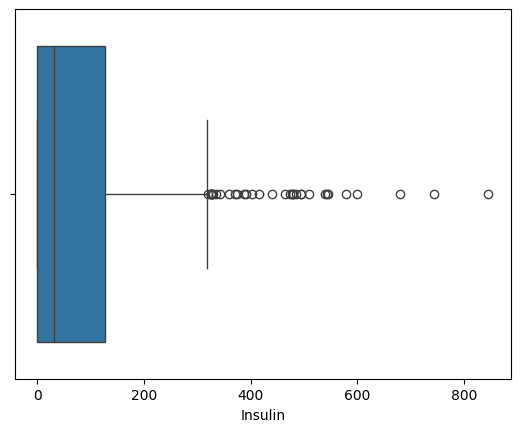

In [5]:
sns.boxplot(x="Insulin",data=df)

In [6]:
q1 = df["Insulin"].quantile(0.25)
q3 = df["Insulin"].quantile(0.75)
IQR = q3 - q1

In [7]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

In [8]:
min_range,max_range

(-190.875, 318.125)

In [9]:
filtered_df = df[df["Insulin"]<=max_range]

In [10]:
filtered_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: xlabel='DiabetesPedigreeFunction'>

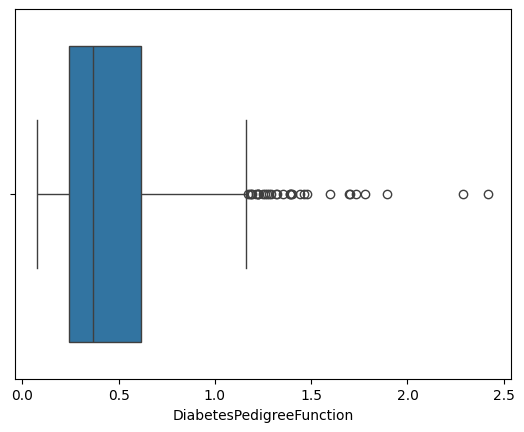

In [11]:
sns.boxplot(x="DiabetesPedigreeFunction",data=filtered_df)

In [12]:
q1 = filtered_df["DiabetesPedigreeFunction"].quantile(0.25)
q3 = filtered_df["DiabetesPedigreeFunction"].quantile(0.75)
IQR = q3 - q1

In [13]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

In [14]:
min_range,max_range

(-0.3125000000000001, 1.1695000000000002)

In [15]:
filtered_df = filtered_df[filtered_df["DiabetesPedigreeFunction"] <= max_range]

In [16]:
filtered_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [17]:
filtered_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,3.839260,118.477952,68.827881,19.779516,61.512091,31.802276,0.423461,33.136558,0.327169
std,3.362445,30.866993,19.849798,15.933928,78.591171,7.826713,0.243751,11.755273,0.469514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.237500,24.000000,0.000000
50%,3.000000,114.000000,72.000000,22.000000,0.000000,32.000000,0.349000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,111.000000,36.300000,0.582500,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,318.000000,67.100000,1.162000,81.000000,1.000000


<Axes: xlabel='DiabetesPedigreeFunction'>

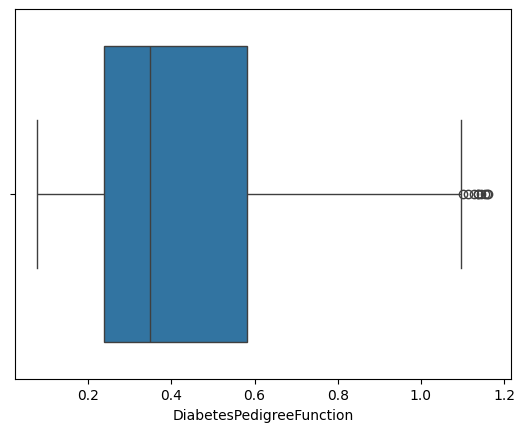

In [18]:
sns.boxplot(x="DiabetesPedigreeFunction",data=filtered_df)

In [19]:
x = filtered_df.iloc[:,:-1]
y = filtered_df["Outcome"]

In [20]:
from imblearn.under_sampling import RandomUnderSampler

In [21]:
rs = RandomUnderSampler()

In [22]:
x,y = rs.fit_resample(x,y)

In [23]:
y.value_counts()

Outcome
0    230
1    230
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()

In [26]:
transformed_data_x = ss.fit_transform(x)

In [27]:
x = pd.DataFrame(transformed_data_x,columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"	,"Age"])

In [28]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.258650,0.265191,0.508438,-1.253959,-0.806406,-0.781365,-0.993975,3.106352
1,-1.151053,-0.500623,-0.101422,-0.023145,-0.806406,-0.715289,1.430753,-0.166528
2,-0.869112,-0.213443,-0.507996,0.161477,0.473928,0.143701,0.135682,-0.608810
3,0.540590,-0.660168,-0.203066,-1.253959,-0.806406,-1.111746,-0.739803,-0.431897
4,-0.305231,-0.277261,-0.203066,1.146129,0.884602,0.711956,-1.139217,-0.520353
...,...,...,...,...,...,...,...,...
455,-0.869112,0.137555,0.915012,1.146129,0.522243,0.500513,2.520065,0.275753
456,-1.151053,-0.021989,0.101864,-1.253959,-0.806406,0.474082,-0.703492,1.602596
457,0.540590,2.115909,1.118299,-1.253959,-0.806406,0.368360,-0.622802,2.840983
458,1.386412,1.477730,0.203508,0.653803,-0.806406,1.491655,-0.118491,0.806490


In [29]:
y

123    0
202    0
651    0
587    0
318    0
      ..
755    1
757    1
759    1
761    1
766    1
Name: Outcome, Length: 460, dtype: int64

In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
fs = SequentialFeatureSelector(lr,k_features=5,forward=True,scoring="accuracy",cv=5)

In [33]:
fs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(5, 5),
                          scoring='accuracy')

In [34]:
fs.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [35]:
fs.k_feature_names_

('Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age')

In [36]:
list_of_selected_features = (fs.k_feature_names_)

In [37]:
fs.k_score_

0.7543478260869565

In [38]:
list_of_selected_features

('Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age')

In [39]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.258650,0.265191,0.508438,-1.253959,-0.806406,-0.781365,-0.993975,3.106352
1,-1.151053,-0.500623,-0.101422,-0.023145,-0.806406,-0.715289,1.430753,-0.166528
2,-0.869112,-0.213443,-0.507996,0.161477,0.473928,0.143701,0.135682,-0.608810
3,0.540590,-0.660168,-0.203066,-1.253959,-0.806406,-1.111746,-0.739803,-0.431897
4,-0.305231,-0.277261,-0.203066,1.146129,0.884602,0.711956,-1.139217,-0.520353
...,...,...,...,...,...,...,...,...
455,-0.869112,0.137555,0.915012,1.146129,0.522243,0.500513,2.520065,0.275753
456,-1.151053,-0.021989,0.101864,-1.253959,-0.806406,0.474082,-0.703492,1.602596
457,0.540590,2.115909,1.118299,-1.253959,-0.806406,0.368360,-0.622802,2.840983
458,1.386412,1.477730,0.203508,0.653803,-0.806406,1.491655,-0.118491,0.806490


In [40]:
df_selected_x = x[list(list_of_selected_features)].copy()

In [41]:
df_selected_x.head(20)

,Pregnancies,Glucose,BloodPressure,BMI,Age
0,0.258650,0.265191,0.508438,-0.781365,3.106352
1,-1.151053,-0.500623,-0.101422,-0.715289,-0.166528
2,-0.869112,-0.213443,-0.507996,0.143701,-0.608810
3,0.540590,-0.660168,-0.203066,-1.111746,-0.431897
4,-0.305231,-0.277261,-0.203066,0.711956,-0.520353
5,-1.151053,-0.564441,0.000221,0.883755,-1.051091
6,-1.151053,0.265191,0.406795,-0.041312,-1.139547
7,0.540590,-1.234529,0.406795,-0.199895,0.718034
8,-0.023291,-0.021989,0.508438,-0.094173,0.010384
9,-0.023291,0.424736,0.711725,-0.199895,-0.343441


In [42]:
y.shape

(460,)

In [43]:
x.shape

(460, 8)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_selected_x,y,random_state=42,test_size=0.2)

In [45]:
x_train

,Pregnancies,Glucose,BloodPressure,BMI,Age
455,-0.869112,0.137555,0.915012,0.500513,0.275753
57,-0.305231,-0.564441,0.101864,-0.913518,-0.608810
155,-0.023291,-0.883531,-0.711283,-1.574279,-0.697266
290,1.950292,0.360918,-3.557300,2.588520,0.541121
24,0.258650,0.743825,0.406795,0.130486,2.752527
...,...,...,...,...,...
106,0.822531,0.009920,0.000221,-0.953163,0.275753
270,-0.869112,-0.213443,0.915012,0.236208,0.541121
348,-0.869112,2.307363,0.305151,0.500513,-0.431897
435,-0.305231,1.445821,0.203508,-0.371693,-0.254985


In [46]:
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
lr.score(x_test,y_test)

0.7391304347826086

In [48]:
lr.score(x_train,y_train)

0.7635869565217391

In [49]:
input_data = [[-0.897662, 0.13004, 0.910041, 0.465966, 2.547379]]

In [50]:
prediction = lr.predict(input_data)
prediction

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [51]:
from mlxtend.plotting import plot_decision_regions


In [52]:
df_selected_x

,Pregnancies,Glucose,BloodPressure,BMI,Age
0,0.258650,0.265191,0.508438,-0.781365,3.106352
1,-1.151053,-0.500623,-0.101422,-0.715289,-0.166528
2,-0.869112,-0.213443,-0.507996,0.143701,-0.608810
3,0.540590,-0.660168,-0.203066,-1.111746,-0.431897
4,-0.305231,-0.277261,-0.203066,0.711956,-0.520353
...,...,...,...,...,...
455,-0.869112,0.137555,0.915012,0.500513,0.275753
456,-1.151053,-0.021989,0.101864,0.474082,1.602596
457,0.540590,2.115909,1.118299,0.368360,2.840983
458,1.386412,1.477730,0.203508,1.491655,0.806490


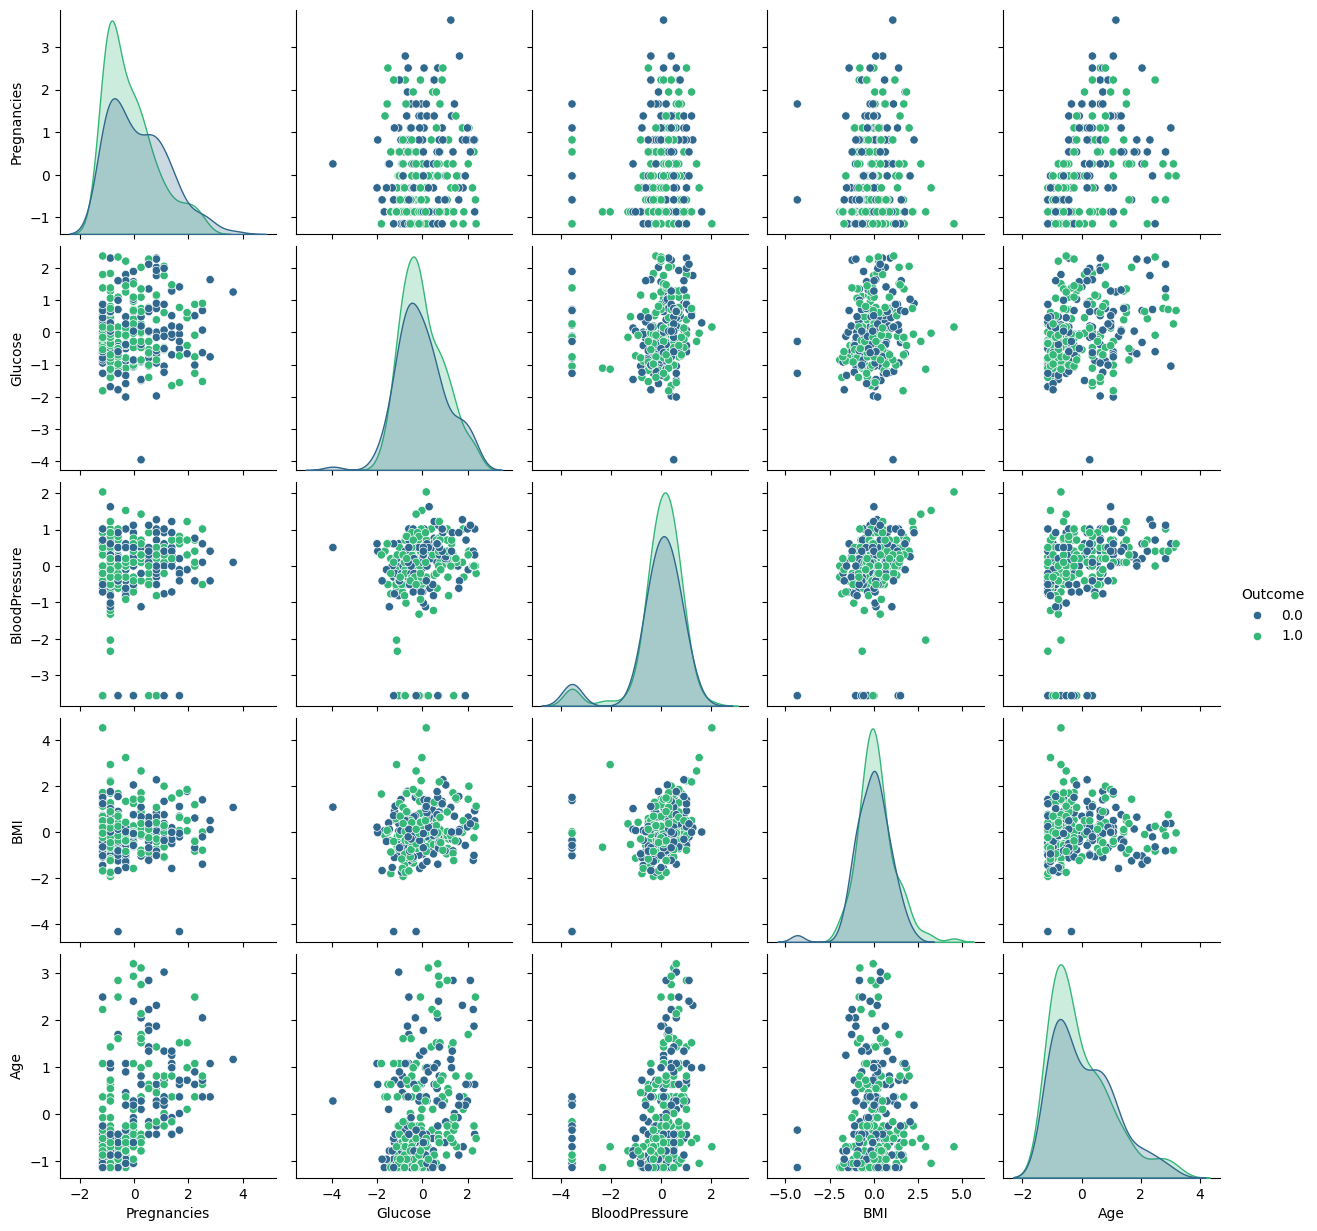

In [53]:
sns.pairplot(
    data=pd.concat([df_selected_x[list(list_of_selected_features)], y], axis=1),
    hue='Outcome',  # Target column name
    palette='viridis'
)